<a href="https://colab.research.google.com/github/abhi1ranjan/RL-agorithm-practise/blob/main/RL_algorithms_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q-Learning implementation using gym environment**

In [1]:
import gym
import numpy as np

In [2]:
# Load the environment
env = gym.make('FrozenLake-v0')

Implement the Q-Learning algorithm

In [3]:
# Initialize the table with all zeroes to maintain uniformity
QTable = np.zeros([env.observation_space.n,env.action_space.n]) 

# learning parameters values
LRate = 0.5
discountFactor = 0.95
totalEpisodes = 2000

# Maintain lists to store the total rewards and steps per episode
Jlist = []
Rlist = []

for itr in range(totalEpisodes):
  #reset the environment and get the new observation
  s = env.reset()
  rAll = 0
  d = False
  j = 0     # denote steps

  # The Q-learning table algorithm
  while j<99:
    j=+1
    # action will be chosen in greedy manner and will picked from Q-table
    action = np.argmax(QTable[s,:] + np.random.randn(1,env.action_space.n)*(1./(itr+1)))
    # Fetch new state and reward from the environment
    s1,r,d,_ = env.step(action)
    # update Q-table using the bellman equation with the help of new information just obtained
    QTable[s,action] = QTable[s,action] + LRate*(r + discountFactor*np.max(QTable[s1,:])-QTable[s,action])
    rAll += r
    s = s1
    if d == True:
      # print("hi")
      break
  Jlist.append(j)
  Rlist.append(rAll)


In [ ]:
Rlist

In [5]:
QTable.shape

(16, 4)

In [6]:
print("score over time instance: " + str(sum(Rlist)/totalEpisodes))

score over time instance: 0.213


In [ ]:
print("Final Q-table values \n", QTable) #when score is 0.216

Final Q-table values 
 [[3.38182689e-02 3.90756950e-03 4.02887492e-03 4.11781779e-03]
 [2.15629456e-03 2.35644754e-03 2.69104789e-03 4.34198917e-03]
 [3.72065078e-03 4.02285255e-03 0.00000000e+00 4.87726756e-03]
 [2.05264354e-03 3.08794193e-03 3.28312772e-03 6.79860988e-03]
 [4.29767935e-02 2.09511137e-03 1.90645553e-03 1.31890605e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.25318047e-03 4.26739646e-04 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.65924208e-03 5.57885940e-02]
 [2.32868389e-03 7.02337085e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.88831445e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.37854939e-04 2.33452984e-04 2.75709879e-04 1.72049042e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.86453791e-01]
 [0.00000000e+00 0.00000000e+00 

In [ ]:
print("Final Q-table values", QTable)  # when score is 0.28

Final Q-table values [[0.01746332 0.10590996 0.01547394 0.01658849]
 [0.0006966  0.00858767 0.00465219 0.06451269]
 [0.00293171 0.00481483 0.03029571 0.00265921]
 [0.         0.00129215 0.00214694 0.06509362]
 [0.13153378 0.0066275  0.00434676 0.01517411]
 [0.         0.         0.         0.        ]
 [0.         0.03302458 0.00209638 0.0011909 ]
 [0.         0.         0.         0.        ]
 [0.01080973 0.0063861  0.00203285 0.16350595]
 [0.00835711 0.16594574 0.0099972  0.        ]
 [0.11156529 0.00128714 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.0010198  0.         0.         0.08728638]
 [0.         0.48049488 0.         0.        ]
 [0.         0.         0.         0.        ]]


**Tensorflow implementation of simple Q-Network learning**

In [7]:
import gym
import numpy as np
import random
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Load the environment

env = gym.make('FrozenLake-v0')

implementing the network itself

In [9]:
# tf.reset_default_graph()
tf.compat.v1.reset_default_graph()

In [10]:
# establishing the feed-forward part of the network used to choose actions

# tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()
inputs1 = tf.compat.v1.placeholder(shape = [1,16],dtype = tf.float32)
W = tf.Variable(tf.random.uniform([16,4],0,0.01))
QOutput = tf.matmul(inputs1,W)
predict = tf.argmax(QOutput,1)

In [17]:
# Find the loss using the loss function which is sum of square difference between the target and predicted Q values

NextQ = tf.compat.v1.placeholder(shape = [1,4], dtype = tf.float32)
loss = tf.reduce_sum(tf.square(NextQ - QOutput))
lossSm = tf.summary.scalar("loss", loss) # scalar summary for tensorboard
# trainer = tf.optimizers.SGD(learning_rate = 0.2)
trainer = tf.train.GradientDescentOptimizer(learning_rate = 0.2)
# tf.disable_v2_behavior()
updateModel = trainer.minimize(loss)

Training the network

In [19]:
init = tf.initialize_all_variables()

# set learning parameters

yGamma = 0.99
e = 0.1
numOfEpisodes = 2000

# creating lists to store the total rewards and steps per episode

jList = []
rList = []

with tf.Session() as sess:
  writer = tf.summary.FileWriter("log", sess.graph)
  sess.run(init)
  for itr in range(numOfEpisodes):
    # Reset environment and get new observation
    s = env.reset()
    rTotal = 0
    d = False      # denote whether goal has been reached or not
    j = 0

    # Q-network
    while j<99:
      j += 1
      # choose an action in greedy manner (with e chance of random action selection) for the Q-network -> making it as an epsilon-greedy method
      a,allQ = sess.run([predict,QOutput],feed_dict = {inputs1:np.identity(16)[s:s+1]})
      if np.random.rand(1) < e:
        a[0] = env.action_space.sample()
      
      # Get new state and reward from environment
      sNew,rNew,d,_ = env.step(a[0])
      # obtain the Q valuew by feeding the new state through our network
      QNew = sess.run(QOutput, feed_dict = {inputs1:np.identity(16)[sNew:sNew+1]})
      # find the maximum Q-value and set our target value for the chosen action
      maxQNew = np.max(QNew)
      targetQ = allQ
      targetQ[0,a[0]] = rNew + yGamma*maxQNew
      #train the network using target and predicted Q-value and here The W1 is not used, but left for visualization purposes
      Lo,_,wNew = sess.run([lossSm,updateModel,W],feed_dict = {inputs1:np.identity(16)[s:s+1],NextQ:targetQ}) 
      rTotal += rNew
      s = sNew
      if d == True:
        # Reduce chance of random action as we train the model
         e = 1./((itr/50) +10)
         break
    jList.append(j)
    rList.append(rTotal)
print("Precent of successful episodes:" + str(sum(rList)/numOfEpisodes) + "%")


Precent of successful episodes:0.4335%


In [37]:
targetQ

array([[0.5970079 , 0.6472249 , 0.60459685, 1.0072309 ]], dtype=float32)

In [40]:
QNew

array([[0.00123535, 0.00275389, 0.0005066 , 0.00730386]], dtype=float32)

In [31]:
print("Weight Matrix:- \n",wNew)

Weight Matrix:- 
 [[4.3546045e-01 4.2358685e-01 4.2883241e-01 4.1662788e-01]
 [3.4085956e-01 8.2407236e-02 3.6030829e-01 4.4766659e-01]
 [2.8801608e-01 2.3454209e-01 2.5129345e-01 3.9640316e-01]
 [1.3169068e-01 2.1876067e-01 2.0950826e-01 3.6660385e-01]
 [4.3569061e-01 2.3707007e-01 4.2566764e-01 4.0415201e-01]
 [5.6184372e-03 2.2728718e-03 2.5395476e-03 1.8989742e-03]
 [2.1172638e-01 1.4374249e-02 3.0656487e-02 1.1399869e-02]
 [9.1741951e-03 7.6095057e-03 1.5281236e-03 2.5195181e-03]
 [3.4572014e-01 3.2960898e-01 3.7174752e-01 4.5029631e-01]
 [1.7634083e-01 5.2278352e-01 3.2283792e-01 2.3595579e-01]
 [1.4829499e-01 7.0518351e-01 2.2932558e-01 1.3810708e-01]
 [5.8152196e-03 2.2002077e-03 8.2593048e-03 8.4465099e-03]
 [5.0538359e-03 5.1122797e-03 2.2528695e-03 7.6915324e-03]
 [2.2941500e-01 4.2120638e-01 5.0163156e-01 1.2873845e-01]
 [5.9700787e-01 6.4722490e-01 6.0459685e-01 8.8332760e-01]
 [1.2353479e-03 2.7538906e-03 5.0659536e-04 7.3038647e-03]]


Statistical analysis of Network performance

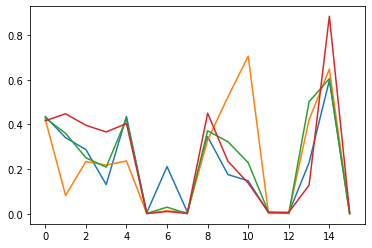

In [29]:
plt.plot(wNew)

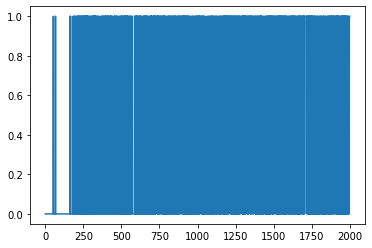

In [20]:
plt.plot(rList)

We can see that the network beings to consistly reach the goal around the 350 episode mark.
It also begins to progress through the environment for longer than chance constraint after 350 episodes are completed.

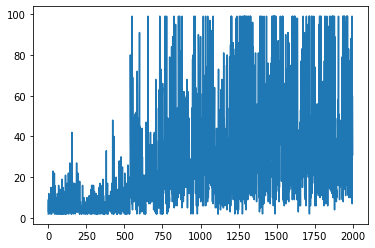

In [16]:
plt.plot(jList)

**Implementing Monte Carlo policy Gradient algorithm**